### Importing Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [ ]:
# Load the dataset
df = pd.read_csv('data_clean.csv')

# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        707 non-null    object 
 1   feature        707 non-null    object 
 2   brand          707 non-null    object 
 3   price          707 non-null    float64
 4   rating         707 non-null    float64
 5   color          707 non-null    object 
 6   ear_placement  707 non-null    object 
 7   form_factor    707 non-null    object 
 8   impedance      707 non-null    object 
 9   image_url      707 non-null    object 
 10  reviews        707 non-null    object 
dtypes: float64(2), object(9)
memory usage: 60.9+ KB


In [ ]:
# Display first five rows of the dataset
df.head()

,product,feature,brand,price,rating,color,ear_placement,form_factor,impedance,image_url,reviews
0,Baseus Eli 2i Fit Open-Ear Headphones,"8.8g Secure Fit, 36H Battery, BassUp Technolog...",Baseus,15.99,4.4,Black,Open Ear,Open Ear,16 Ohms,https://m.media-amazon.com/images/I/51XnDCIDaF...,[{'review': 'These are actually surprisingly n...
1,Baseus E20 True Wireless Earbuds,"12mm Drivers with Powerful Bass, 33H Long Play...",Baseus,15.99,4.6,White,In Ear,In Ear,Not Specified,https://m.media-amazon.com/images/I/51q9mJAXJj...,[{'review': 'I am seriously impressed with the...
2,Baseus BS1 NC Semi-in-Ear Noise Cancelling Ear...,"No Ear Pressure, Hi-Res Audio (LDAC), 40H Play...",Baseus,21.99,4.3,Black,In Ear,In Ear,16 Ohms,https://m.media-amazon.com/images/I/51V95ukJfM...,[{'review': 'absolutely amazing! Clear sound q...
3,Baseus Bass BS1 NC Semi-in-Ear True Wireless N...,"Hi-Res Audio (LDAC), 40H Playtime, 4g Ultra-Li...",Baseus,39.89,4.3,White,In Ear,In Ear,16 Ohms,https://m.media-amazon.com/images/I/41a41P57iZ...,[{'review': 'absolutely amazing! Clear sound q...
4,Baseus Bass BP1 Pro Noise Cancelling Wireless ...,"Real-Time Adaptive Noise Cancelling, Adaptive ...",Baseus,27.99,4.3,Ocean Blue,In Ear,In Ear,Not Specified,https://m.media-amazon.com/images/I/41SsqSVMpT...,[{'review': 'Have you ever felt the gut rumbli...


In [ ]:
# Show value counts for 'form_factor' column
df['form_factor'].value_counts()

form_factor
In Ear                                    534
Open Ear                                   65
True Wireless                              60
Over Ear                                   18
On Ear                                     11
Open Ear earbuds /Over the ear earbuds      7
open ear                                    6
Open ear                                    6
Name: count, dtype: int64

In [ ]:
# Standardize 'form_factor' entries
df['form_factor'] = df['form_factor'].replace({
    'Open ear': 'Open Ear',
    'open ear': 'Open Ear',
    'Open Ear earbuds /Over the ear earbuds': 'Open/Over Ear Earbuds'
})

In [ ]:
# Show value counts for 'form_factor' column after standardization
df['form_factor'].value_counts()

form_factor
In Ear                   534
Open Ear                  77
True Wireless             60
Over Ear                  18
On Ear                    11
Open/Over Ear Earbuds      7
Name: count, dtype: int64

### Exploratory Data Analysis

In [29]:
df['form_factor'].value_counts()

form_factor
In Ear                   534
Open Ear                  77
True Wireless             60
Over Ear                  18
On Ear                    11
Open/Over Ear Earbuds      7
Name: count, dtype: int64

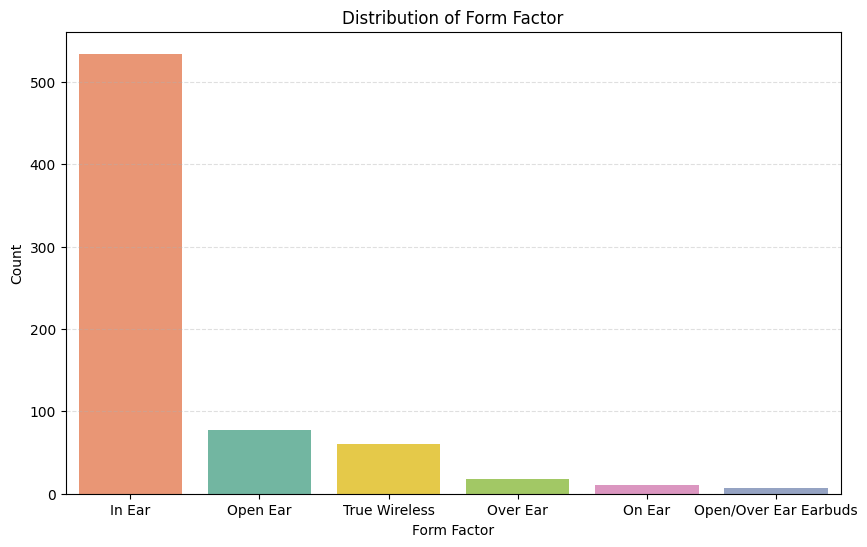

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, 
            x='form_factor', 
            order=df['form_factor'].value_counts().index,
            hue='form_factor',
            palette='Set2')
plt.title('Distribution of Form Factor')
plt.xlabel('Form Factor')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [41]:
average_price = (df.groupby('brand')['price'].mean().reset_index().sort_values(by='price', ascending=False).head(10))
average_price.rename(columns={'price': 'average_price'}, inplace=True)

average_price

,brand,average_price
13,Sennheiser,188.970851
1,Bose,186.192188
5,Huawei,93.556000
4,Golrex,89.980000
11,Realme,75.525918
15,Skullcandy,68.418571
6,Jbl,61.089797
10,Monster,59.990000
9,Lenovo,55.990000
0,Baseus,50.277640


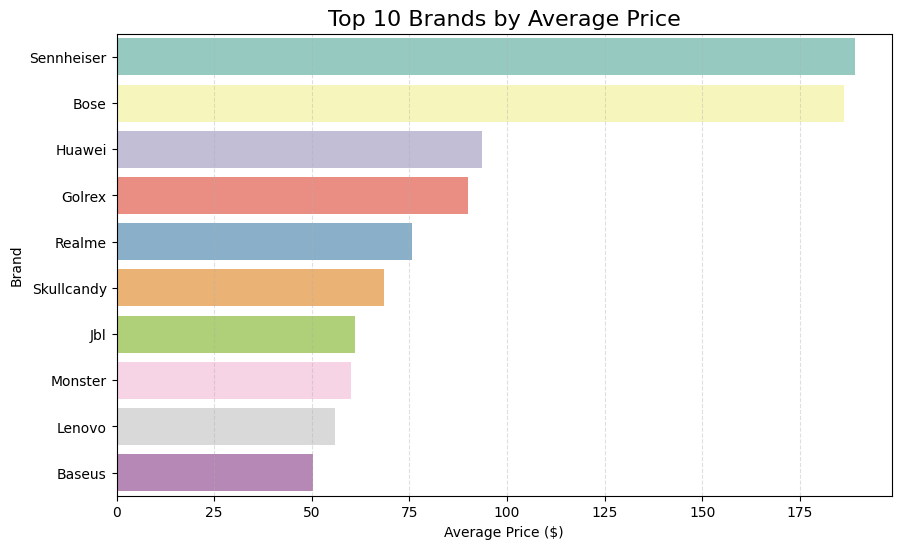

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price,
            x='average_price', 
            y='brand', 
            hue='brand', 
            palette='Set3')
plt.title('Top 10 Brands by Average Price', 
            fontsize=16)
plt.xlabel('Average Price ($)')
plt.ylabel('Brand')
plt.grid(axis='x', 
        linestyle='--', 
        alpha=0.4)
plt.show()

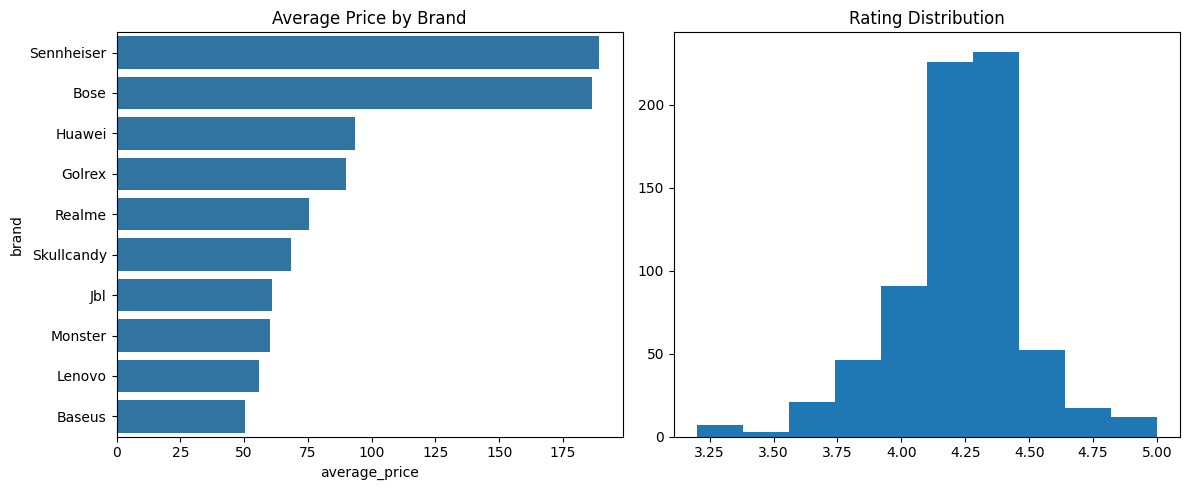

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Chart 1: Bar plot
sns.barplot(x=average_price['average_price'],
            y=average_price['brand'],
            ax=axes[0])
axes[0].set_title("Average Price by Brand")

# Chart 2: Histogram
axes[1].hist(df['rating'], bins=10)
axes[1].set_title("Rating Distribution")

plt.tight_layout()
plt.show()